# HW 8 Resubmission
Nick Goralka 

11/14/2023

![](boundary_cond.png)

/tmp/ipykernel_252/1801714802.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


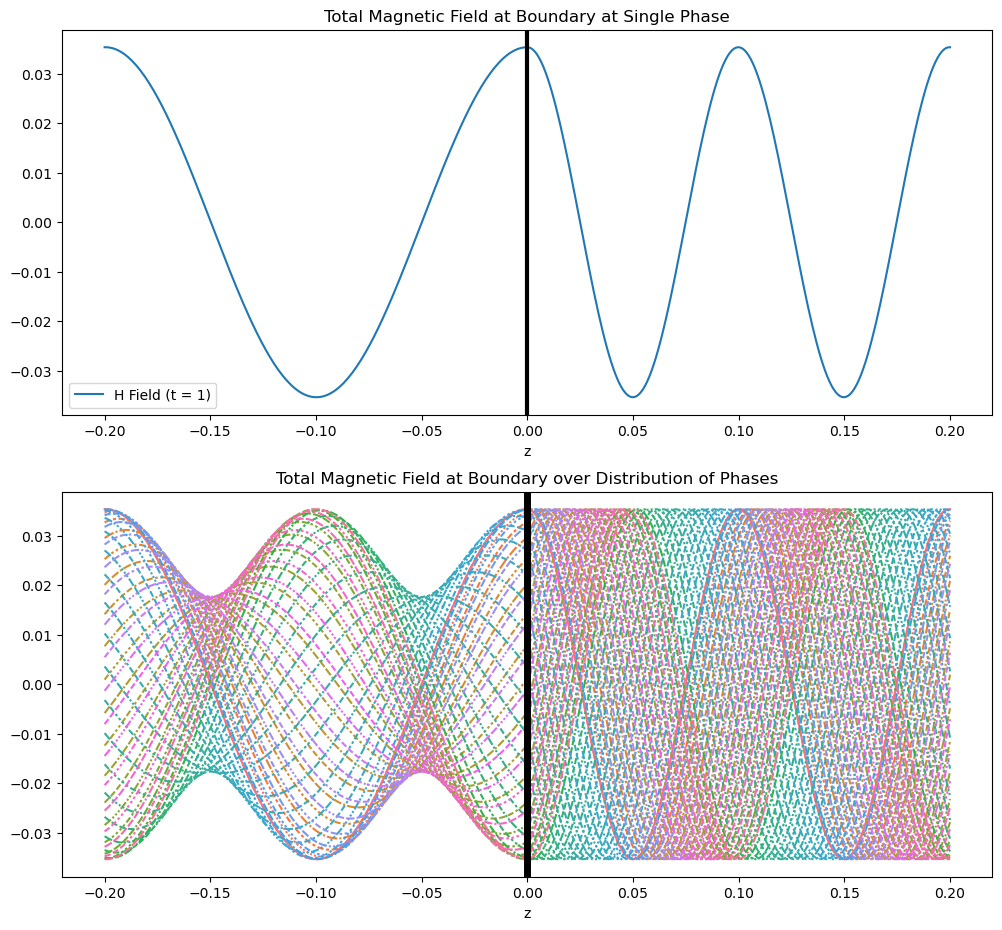

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import e, pi

# define material properties
mu_free_space = 1.26e-6
mu1 = mu_free_space
mu2 = mu_free_space

epsilon_free_space = 8.85e-12
epsilon_1 = 1 * epsilon_free_space
epsilon_2 = 4 * epsilon_free_space

eta_2 = math.sqrt(mu2/epsilon_2)
eta_1 = math.sqrt(mu1/epsilon_1)

def reflection_coefficent(z_val, beta): 
     return ( eta_2 - eta_1 ) / ( eta_2 + eta_1 ) 

transmission_coefficent = 2 * eta_2 / ( eta_2 + eta_1 )

# define wave properties somewhat arbitrarially 
E0_incident = 10
w = 2 * pi * 1.5e9 # 1.5 GHz frequency 
beta1 = w * math.sqrt(mu1 * epsilon_1)
beta2 = w * math.sqrt(mu2 * epsilon_2)

# define z linear space 
z = np.linspace(-0.2, 0.2, 400)

def H1_y (z_val, t):
    gamma = reflection_coefficent(z_val, beta1)
    phasor = E0_incident / eta_1 * (1 - gamma * e ** (2j * beta1 * z_val)) * e ** (-1j * beta1 * z_val)
    return np.real(phasor * e ** (1j * w * t))

def H2_y (z_val, t):
    tau = 1 + reflection_coefficent(z_val, beta2)
    phasor = E0_incident / eta_2 * tau * e ** (-1j * beta2 * z_val)
    return np.real(phasor * e ** (1j * w * t))

num_t = 50

mag_wave_t1 = np.zeros(400)

mag_wave_other_t = []

t_half_phase = 1 + 0.5e-9
t_quarter_phase = 1 + 0.25e-9

t_lin_space = np.linspace(1, 1 + 1e-9, num_t)

for j, t in enumerate(t_lin_space):
    mag_wave = np.zeros(400)
    for i, z_val in enumerate(z):
        if z_val < 0 :
            mag_wave_t1[i] = H1_y(z_val, 1)
            mag_wave[i] = H1_y(z_val, t)   
        else:
            mag_wave_t1[i] = H2_y(z_val, 1)
            mag_wave[i] = H2_y(z_val, t)
    mag_wave_other_t.append(mag_wave)           
        
data_wave = { 'z' : z,
         'H Field (t = 1)' : mag_wave_t1,
         }

data_wave = pd.DataFrame(data_wave)
data_wave = data_wave.set_index('z')

data_waves = data_wave.copy()

for i, t in enumerate(t_lin_space):
    data_waves[f"t={t}"] = mag_wave_other_t[i]

# Set the width and height of the figure
fig, axes = plt.subplots(2, 1)

fig.set_size_inches(12, 11)

axes[0].set_title("Total Magnetic Field at Boundary at Single Phase")
sns.lineplot(data_wave, ax=axes[0])
axes[0].axvline(x=0, color='black', lw=3)
# axes[0].text(2, 6, r'an equation: $E=mc^2$', fontsize=15)#axes[0].text(1, 7, 'Region 1', size=12, math_fontfamily='cm')

# Add title
axes[1].set_title("Total Magnetic Field at Boundary over Distribution of Phases")
sns.lineplot(data_waves, ax=axes[1], legend=False)
axes[1].axvline(x=0, color='black', lw=5)

fig.show()

